In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.datasets import make_blobs
from networkx import random_shell_graph
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification, load_breast_cancer, fetch_openml, load_iris, fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve, roc_auc_score, auc
     
from sklearn.linear_model import Perceptron
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from numpy.random import shuffle
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
import setuptools
from yellowbrick.classifier import ROCAUC

# № 1
Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

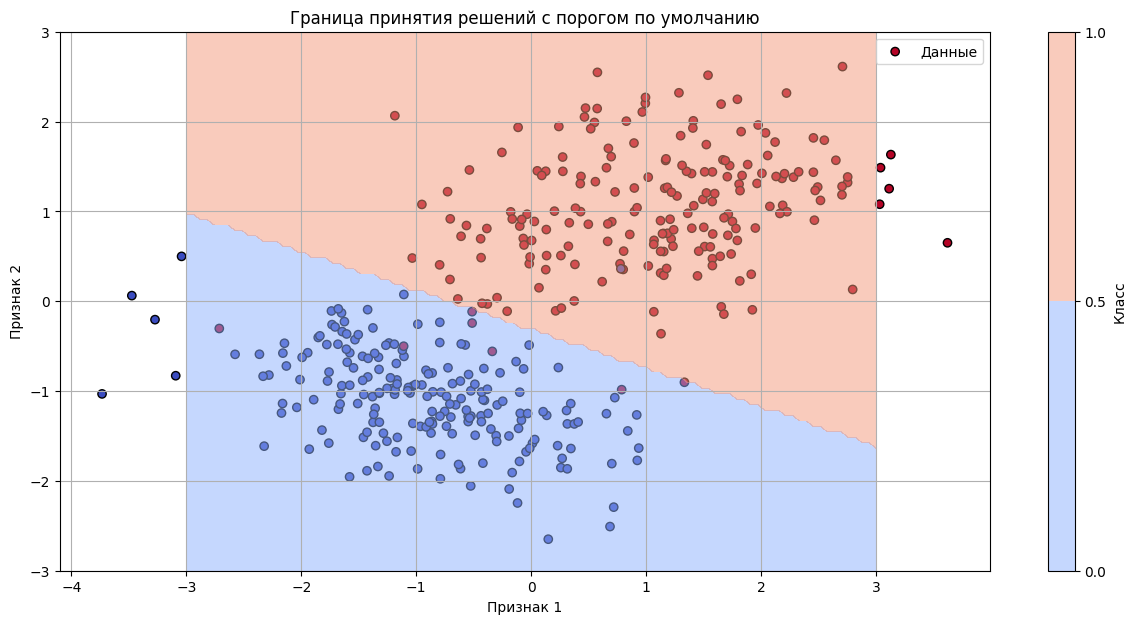

In [3]:
# Создаем двумерный датасет
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=19)

X_train, y_train = X, y

model = LogisticRegression().fit(X_train, y_train)

plt.figure(figsize=(15, 7))

# Визуализируем точки датасета
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Данные')

# Визуализируем границу принятия решений (разделяющую поверхность)
# Для этого создадим сетку точек и вычислим предсказания модели для каждой точки сетки
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализируем границу принятия решений как контурный график
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5, levels=[0, 0.5, 1])

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница принятия решений с порогом по умолчанию')

plt.legend()
plt.colorbar(label='Класс')
plt.grid(True)
plt.show()

# № 2
Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

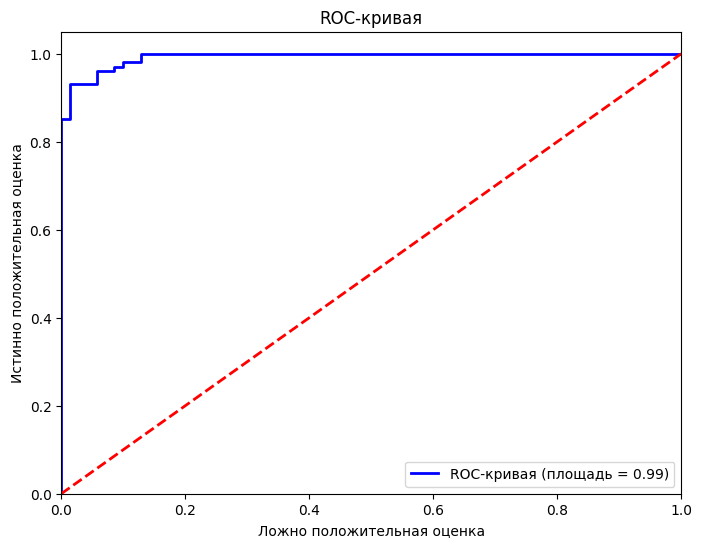

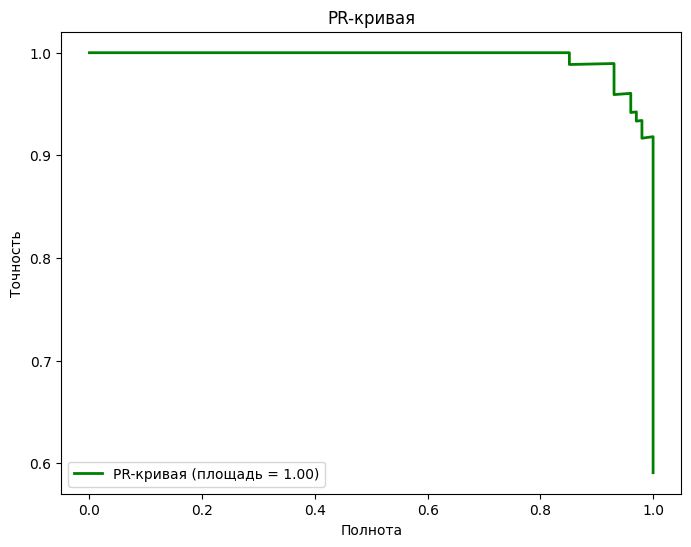

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.96      0.95      0.96       101

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [4]:
breast_cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=19)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Получение вероятностей классов на тестовой выборке
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривой ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Истинно положительная оценка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Построение кривой Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='PR-кривая (площадь = %0.2f)' % pr_auc)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривая')
plt.legend(loc='lower left')
plt.show()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# № 3
В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

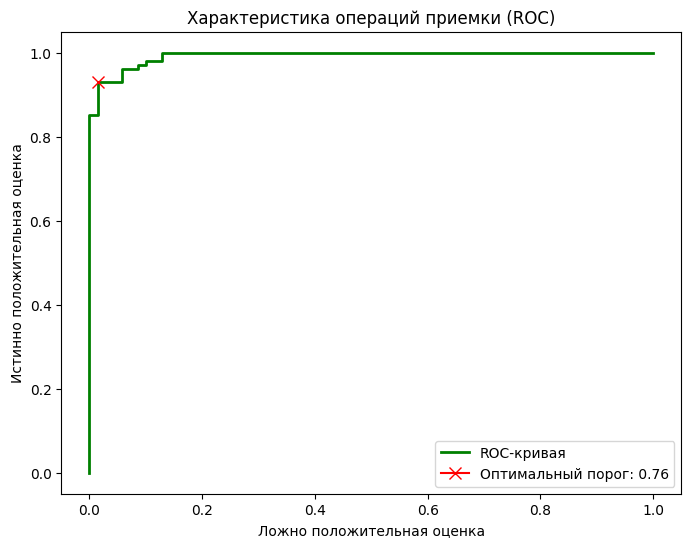

Отчет о классификации с оптимальным порогом:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        70
           1       0.99      0.93      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171

Оптимальный порог: 0.7648520024144768


In [5]:
# Построение кривой ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление значения среднего геометрического между TPR и FPR для каждого порога
geometric_mean = np.sqrt(tpr * (1 - fpr))

# Находим порог, соответствующий максимальному значению среднего геометрического
best_threshold_index = np.argmax(geometric_mean)
best_threshold = thresholds[best_threshold_index]

# Оценка модели с использованием оптимального порога
y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)

# Построение ROC-кривой с оптимальным порогом
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC-кривая')
plt.plot(fpr[best_threshold_index], tpr[best_threshold_index], marker='x', markersize=8, color='red', label=f'Оптимальный порог: {best_threshold:.2f}')
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Истинно положительная оценка')
plt.title('Характеристика операций приемки (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Отчет о классификации с оптимальным порогом:")
print(classification_report(y_test, y_pred_optimized))

print("Оптимальный порог:", best_threshold)

# № 4
При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

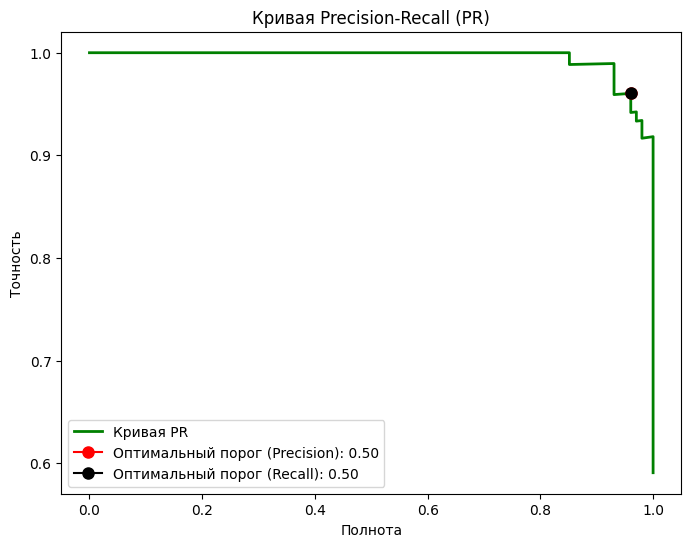

Отчет о классификации с оптимизированным порогом (точность):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.96      0.96      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Отчет о классификации с оптимизированным порогом (полнота):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.96      0.96      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Оптимальный порог (точность): 0.4972296418970551
Оптимальный порог (полнота): 0.4972296418970551


In [6]:
# Построение кривой PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Вычисление F-метрики с преимуществом precision для каждого порога
f1_precision = 2 * (precision * recall) / (precision + recall)

# Вычисление F-метрики с преимуществом recall для каждого порога
f1_recall = 2 * (precision * recall) / (precision + recall)

# Находим порог, соответствующий максимальным значениям F-метрик
best_threshold_precision = thresholds[np.argmax(f1_precision)]
best_threshold_recall = thresholds[np.argmax(f1_recall)]

# Оценка модели с использованием оптимальных порогов
y_pred_optimized_precision = (y_pred_proba >= best_threshold_precision).astype(int)
y_pred_optimized_recall = (y_pred_proba >= best_threshold_recall).astype(int)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Кривая PR')
plt.plot(recall[np.argmax(f1_precision)], precision[np.argmax(f1_precision)], marker='o', markersize=8, color='red', label=f'Оптимальный порог (Precision): {best_threshold_precision:.2f}')
plt.plot(recall[np.argmax(f1_recall)], precision[np.argmax(f1_recall)], marker='o', markersize=8, color='black', label=f'Оптимальный порог (Recall): {best_threshold_recall:.2f}')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая Precision-Recall (PR)')
plt.legend(loc='lower left')
plt.show()

print("Отчет о классификации с оптимизированным порогом (точность):")
print(classification_report(y_test, y_pred_optimized_precision))

print("Отчет о классификации с оптимизированным порогом (полнота):")
print(classification_report(y_test, y_pred_optimized_recall))

print("Оптимальный порог (точность):", best_threshold_precision)
print("Оптимальный порог (полнота):", best_threshold_recall)


# № 5
Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

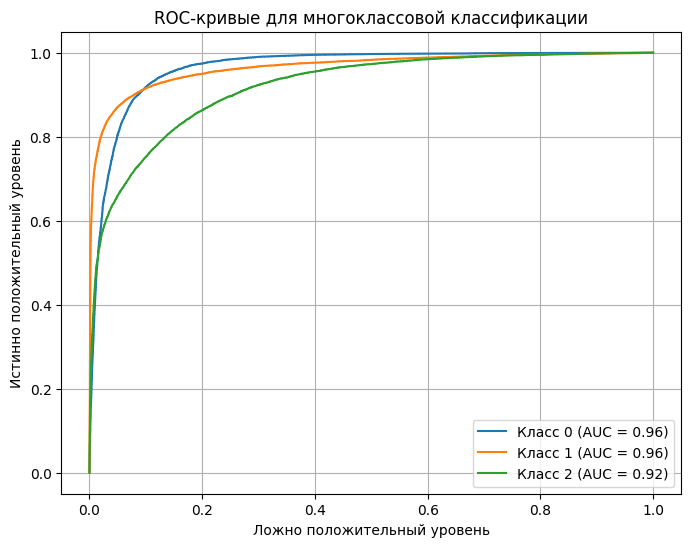

In [7]:
X, y = make_classification(n_samples=100000, n_classes=3, n_features=20, n_clusters_per_class=1, random_state=19)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')
plt.xlabel('Ложно положительный уровень')
plt.ylabel('Истинно положительный уровень')
plt.title('ROC-кривые для многоклассовой классификации')
plt.legend()
plt.grid(True)
plt.show()

# № 6
Используйте для построения кривых библиотеку yellowbrick.

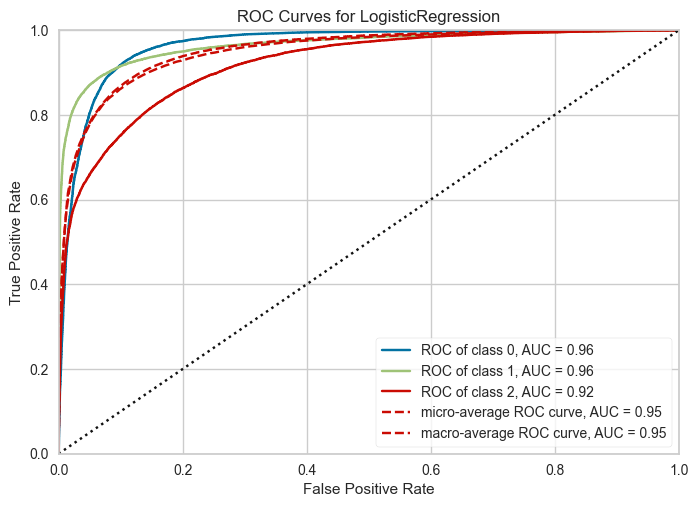

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:

visualizer = ROCAUC(model, classes=model.classes_)
visualizer.fit(X_train, y_train)  # Обучение классификатора
visualizer.score(X_test, y_test)  # Оценка тестовых данных
visualizer.show()